In [259]:
import numpy as np
import matplotlib.pyplot as plt
import jupyter as j
import importlib
import pandas as pd
import seaborn as sns
importlib.reload(j)

import matplotlib.ticker as ticker
import glob

custom jupyter @DanielRobinson


In [135]:
def attdt():
    atf = {}
    atten = np.arange(0, 50, 10)
    for at in atten:
        atf[str(at) + ' dB'] = []
    atf['50-110 dB'] = []
    return atf

def p4():
    # 4x4 plotter
    paxis = []
    haxis = []
    hist = []
    fy = 8
    fx = 12
    fig = plt.figure(figsize=(fx, fy))
    for di, dirr in enumerate(dirrs):
        print(dirr)
        ####################### file prep #######################
        atf = attdt()
        atten = np.arange(110, -1, -10)
        # starfolder = 'release/release128/*'
        for starfolder in files:
            subfiles = glob.glob(dirr + starfolder)
            for file in subfiles:
                f = file.split('\\')[-1]
                for atn in atten:
                    if str(atn) in f:
                        # print(atn, file)
                        if atn >= 50:
                            atf['50-110 dB'].append(file)
                        else:
                            atf[str(atn) + ' dB'].append(file)
                        break
                else:
                    print('else', file)
                    atf['50-110 dB'].append(file)

        ####################### database {} prep #######################

        atd = attdt()
        for k in atf:
            # print(k, atf[k])
            for f in atf[k]:
                c = j.csvToDict(f)
                dp = j.dataProcess(c)
                atd[k].append(dp)
            atd[k] = j.merge(atd[k])
            # print('atd[k]', len(atd[k]))

        ####################### scatter #######################
        # fig = plt.figure()
        ax = fig.add_subplot(2, 2, di + 1)
        y = []
        x = []
        ka = []

        for i, k in enumerate(atd):
            try:
                ka.append(k)
                xx = np.array(atd[k][kx])
                yy = np.array(atd[k][ky])
                r = xx == xx
                r *= xx < -100
                r *= xx > -2000
                r2 = yy == yy
                r *= yy > 0
                r *= r2
                yy /= 1000
                ax.scatter(xx[r], yy[r], linestyle='dotted', color=cc[i], label=k)
                x.append(xx[r])
                y.append(yy[r])
            except (KeyError, IndexError) as e:
                print(e)
        hist.append([x, y])
        # ax = plt.gca()
        paxis.append(ax)
        ax.set_yscale('log')
        ax.set_xlim(plimx)
        ax.set_ylim(plimy)
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(max(y, 0.01)),0)))).format(y)))
        ax.legend()#bbox_to_anchor=(0.97, 1.15))

    plt.show()

    fy = 8
    fx = 12
    fig = plt.figure(figsize=(fx, fy))

    ####################### histogram #######################
    for hi, h in enumerate(hist):
        y = h[1]
        # fig = plt.figure()
        ax = fig.add_subplot(2, 2, hi + 1)
        try:
            data = np.concatenate(np.ravel(y))
        except ValueError:
            data = np.ravel(y)
        finally:
            _, lbins = np.histogram(data, bins=10)
            if not limited:
                logbins = np.logspace(np.log10(lbins[0]), np.log10(lbins[-1]), len(lbins))
            else:
                logbins = np.logspace(np.log10(hlimy[0]), np.log10(hlimy[1]), len(lbins))
            # ax = plt.gca()
            haxis.append(ax)
            n, rbins, _ = ax.hist(y, bins=logbins, log=True, range=hlimy, stacked=True)
            plt.xscale('log')

        ax.set_xlim(hlimx)
        # ax.set_ylim(hlimy)

        for axis in [ax.xaxis, ax.yaxis]:
            axis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(max(y, 0.01)),0)))).format(y)))


    if not limited:
        # pxmin = pymin = pxmax = pymax = 1
        # hxmin = hymin = hxmax = hymax = 1
        plim = [1000, -1000]*2
        hlim = [1000, -1000]*2
        for pax, hax in zip(paxis, haxis):
            for i, p in enumerate(pax.axis()):
                plim[i] = min(plim[i], p) if i in [0, 2] else max(plim[i], p)
            for i, h in enumerate(hax.axis()):
                hlim[i] = min(hlim[i], h) if i in [0, 2] else max(hlim[i], h)
        for pax, hax in zip(paxis, haxis):
            pax.set_xlim(plim[:2])
            pax.set_ylim(plim[2:])
            hax.set_xlim(hlim[:2])
            hax.set_ylim(hlim[2:])
            for axis in [pax.yaxis, hax.yaxis]:
                axis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(max(y, 0.01)),0)))).format(y)))
        np.set_printoptions(precision=0, suppress=True)        
        print('plimx=', np.array(plim[:2]))
        print('plimy=', np.array(plim[2:]))
        print('hlimx=', np.array(hlim[:2]))
        print('hlimy=', np.array(hlim[2:]))

    plt.show()
    # plt.xscale('log')

In [136]:
[[1.1 for b in a] for a in [[1,2], [3,4,5]]]

[[1.1, 1.1], [1.1, 1.1, 1.1]]

In [325]:
def pan4():
    np.set_printoptions(precision=2, suppress=True)
    # 4x4 plotter
    paxis = []
    haxis = []
    hist = []
    aka = []
    fy = 8
    fx = 12
    fig = plt.figure(figsize=(fx, fy))
    for di, dirr in enumerate(dirrs):
        print(dirr)
        ####################### file prep #######################
        atf = attdt()
        atten = np.arange(110, -1, -10)
        # starfolder = 'release/release128/*'
        for starfolder in files:
            subfiles = glob.glob(dirr + starfolder)
            for file in subfiles:
                f = file.split('\\')[-1]
                for atn in atten:
                    if str(atn) in f:
                        # print(atn, file)
                        if atn >= 50:
                            atf['50-110 dB'].append(file)
                        else:
                            atf[str(atn) + ' dB'].append(file)
                        break
                else:
                    print('else', file)
                    atf['50-110 dB'].append(file)

        ####################### database {} prep #######################

        atd = attdt()
        for k in atf:
            # print(k, atf[k])
            for f in atf[k]:
                c = j.csvToDict(f)
                dp = j.dataProcess(c)
                atd[k].append(dp)
            atd[k] = j.merge(atd[k])
            # print('atd[k]', len(atd[k]))

        ####################### scatter #######################
        # fig = plt.figure()
        ax = fig.add_subplot(2, 2, di + 1)
        y = []
        x = []
        ka = []

        for i, k in enumerate(atd):
            try:
                xx = np.array(atd[k][kx])
                yy = np.array(atd[k][ky])
                r = xx == xx
                r *= xx < -100
                r *= xx > -2000
                r2 = yy == yy
                r *= yy > 0
                r *= r2
                yy /= 1000
                ax.scatter(xx[r], yy[r], linestyle='dotted', color=cc[i], label=k)
                x.append(xx[r])
                y.append(yy[r])
                ka.append(k)
            except (KeyError, IndexError) as e:
                print(e)
        hist.append([x, y])
        aka.append(ka)
        # ax = plt.gca()
        paxis.append(ax)
        ax.set_yscale('log')
        ax.set_xlim(plimx)
        ax.set_ylim(plimy)
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(max(y, 0.01)),0)))).format(y)))
        ax.legend()#bbox_to_anchor=(0.97, 1.15))

    plt.show()
    
    ####################### seaborn distribution #######################
    fy = 4
    fx = 12
    fig = plt.figure(figsize=(fx, fy))
    ax = fig.add_subplot(1, 2, 1)
    for hi, h in enumerate(hist):
#         s = pd.Series(h[1])
#         print(s)
        df = pd.DataFrame(h[1])
        sns.distplot(df.T.dropna().values.ravel(), hist=False, kde=True, 
#                      bins=logbins,
                     ax=ax,
#                      color = cc[:1],
#                      color = ('blue', 'black'),
#                      norm_hist=True,
                     hist_kws={'edgecolor':'black'})
    ax.set_xlim(None, 50)
    
    legend = ['1', '2', '3', '4']

    ax = fig.add_subplot(1, 2, 2)
    for hi, h in enumerate(hist):
        df = pd.DataFrame(h[1])
        # df.index = pd.Index(legend)
        data = df.T.dropna().values.ravel()
        sns.distplot(data, hist=False, kde=True,
                     ax=ax,
#                      kde_kws={'weight':[[100]*len(data)]},
                     hist_kws={'edgecolor':'black'})
    ax.set_ylim(0.001, 1)
#     ax.set_xlim(0, 30)
    ax.set_xlim(0, 50)
    
    plt.yscale('log')
    
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
    
    fig.legend(labels=legend)

    
    ####################### histogram #######################
    
    fy = 8
    fx = 12
    fig = plt.figure(figsize=(fx, fy))
    
    lens = []
    lllbins = []
    for hi, h in enumerate(hist):
        y = h[1]
        try:
            data = np.concatenate(np.ravel(y))
        except ValueError:
            data = np.flatten(y)
        finally:
            _, lbins = np.histogram(data, bins=20)
            lens.append(len(data))
            lllbins.append(lbins)
            
    m = max(lens)
    print('len(data)', lens, m/np.array(lens))
    for hi, h in enumerate(hist):
        y = h[1]
        lbins = lllbins[hi]
        ratio = m / lens[hi]
        w = [[ratio for b in a] for a in y]
        w = [ratio] * 6
        # print(w)
        ax = fig.add_subplot(2, 2, hi + 1)
        if not limited:
            logbins = np.logspace(np.log10(lbins[0]), np.log10(lbins[-1]), len(lbins))
        else:
            logbins = np.logspace(np.log10(hlimy[0]), np.log10(hlimy[1]), len(lbins))
        # ax = plt.gca()
        haxis.append(ax)
        # ax.hist(y, bins=logbins, log=True, range=hlimy, stacked=True)
#         print('len(y)', len(y), 'len(aka[hi])', len(aka[hi]))
#         for t in y:
#            print(len(t))
#         for v in w:
#            print(len(v))
#         print(np.repeat(y, ratio).shape)
        for u in range(len(y)):
            y[u] = np.repeat(y[u], np.ceil(ratio))
        df = pd.DataFrame(y)#, columns=k)
        df.index = pd.Index(aka[hi])
        if setLim:
            ax.set_xlim(hlimx)
            ax.set_ylim(hlimy)
        df.T.plot.hist(stacked=True, ax=ax, bins=logbins, density=True, )#, weights=w)
        plt.xscale('log')
        plt.yscale('log')

        for axis in [ax.xaxis, ax.yaxis]:
            axis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(max(y, 0.01)),0)))).format(y)))


    ####################### limits #######################
    if not limited:
        # pxmin = pymin = pxmax = pymax = 1
        # hxmin = hymin = hxmax = hymax = 1
        plim = [v for v in paxis[0].axis()]
        hlim = [v for v in haxis[0].axis()]
        print(plim)
        print(hlim)
        # hlim = [1000, -1000]*2
        for pax, hax in zip(paxis, haxis):
            for i, p in enumerate(pax.axis()):
                plim[i] = min(plim[i], p) if i in [0, 2] else max(plim[i], p)
            for i, h in enumerate(hax.axis()):
                hlim[i] = min(hlim[i], h) if i in [0, 2] else max(hlim[i], h)
        for pax, hax in zip(paxis, haxis):
            pax.set_xlim(plim[:2])
            pax.set_ylim(plim[2:])
            hax.set_xlim(hlim[:2])
            hax.set_ylim(hlim[2:])
            for axis in [pax.yaxis, hax.yaxis]:
                axis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(max(y, 0.01)),0)))).format(y)))
        np.set_printoptions(precision=0, suppress=True)        
        print('plimx=', np.array(plim[:2]))
        print('plimy=', np.array(plim[2:]))
        print('hlimx=', np.array(hlim[:2]))
        print('hlimy=', np.array(hlim[2:]))

    plt.show()
    # plt.xscale('log')

['release/release1/*', 'release/release16/*', 'release/release64/*', 'release/release128/*', 'release/release256/*', 'release/release512/*', 'release/release0/*']
logs/zte_mtn/rf_shield/ublox/
logs/nokia_vodacom/centurycity/ublox/
'Signal power'
logs/zte_mtn/rf_shield/quectel/
'Signal power'
logs/nokia_vodacom/centurycity/quectel/


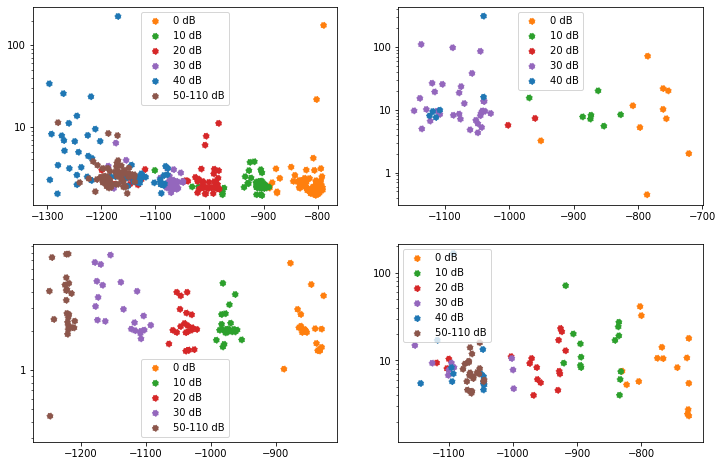

len(data) [308, 57, 112, 89] [1.   5.4  2.75 3.46]
[-1326.0568587716057, -763.4155378738219, 1.1226503392652856, 293.35988829078144]
[0.21848574207196164, 312.84824058444457, 0.00027259872756257603, 8.170051816578047]
plimx= [-1326.  -699.]
plimy= [  0. 433.]
hlimx= [  0. 430.]
hlimy= [0. 8.]


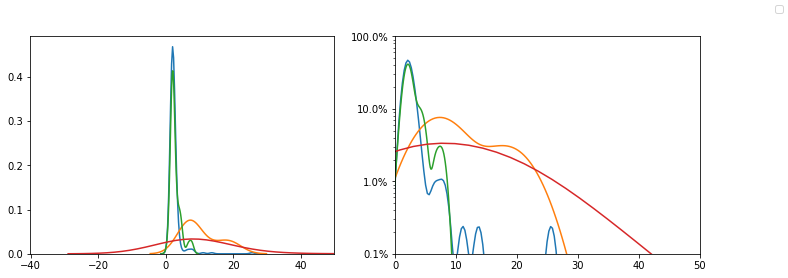

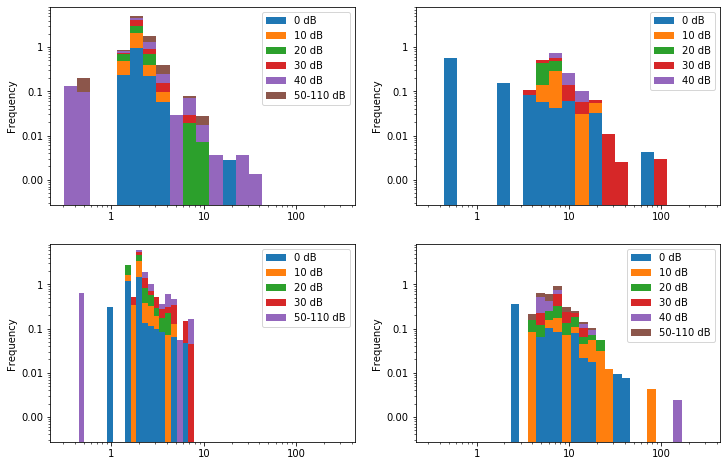

In [326]:
files = []
files.append(['release/release1/*','release/release16/*','release/release64/*','release/release128/*','release/release256/*','release/release512/*', 'release/release0/*'])
# files.append(['echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*'])
# files.append(['cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*'])
# files.append(['drx/cap/*'])
# files.append(['ptau/capture/*'])
files = sum(files, [])
print(files)

cc = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:blue', 'tab:brown']

dirrs = ['logs/zte_mtn/rf_shield/ublox/', 'logs/nokia_vodacom/centurycity/ublox/', 'logs/zte_mtn/rf_shield/quectel/', 'logs/nokia_vodacom/centurycity/quectel/']

ky = 'txTime'
kx = 'Signal power'

limited = False
setLim = False

plimx = [None, None]
plimy = [None, None]
hlimx = [None, None]
hlimy = [None, None]

if limited:
    plimx= [-1350,  -700.]
    plimy= [1, 500]
    #hlimx= [1, 450]
    #hlimy= [1, 70]
    #hlimy= [1, 250]
#     hlimx= [0.1, 100]
#     hlimy= [0.001, 5]
    
pan4()

['cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*']
logs/zte_mtn/rf_shield/ublox/
logs/nokia_vodacom/centurycity/ublox/
'Signal power'
logs/zte_mtn/rf_shield/quectel/
logs/nokia_vodacom/centurycity/quectel/
'Signal power'
'Signal power'


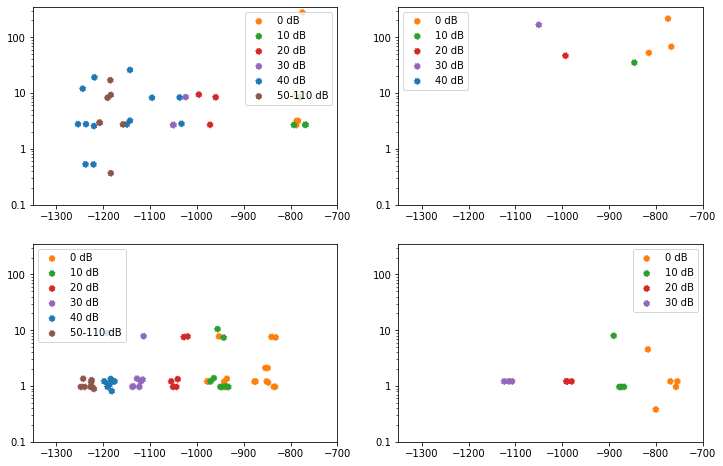

c:\users\d7rob\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:107: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


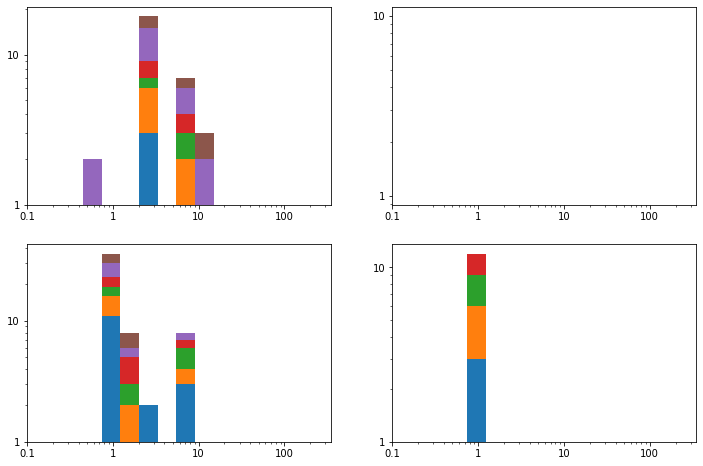

In [190]:
files = []
# files.append(['release/release1/*','release/release16/*','release/release64/*','release/release128/*','release/release256/*','release/release512/*', 'release/release0/*'])
# files.append(['echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*'])
files.append(['cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*'])
# files.append(['drx/cap/*'])
# files.append(['ptau/capture/*'])
files = sum(files, [])
print(files)

cc = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:blue', 'tab:brown']

dirrs = ['logs/zte_mtn/rf_shield/ublox/', 'logs/nokia_vodacom/centurycity/ublox/', 'logs/zte_mtn/rf_shield/quectel/', 'logs/nokia_vodacom/centurycity/quectel/']

ky = 'txTime'
kx = 'Signal power'

limited = True

plimx = [None, None]
plimy = [None, None]
hlimx = [None, None]
hlimy = [None, None]

if limited:
    plimx= [-1350, -700]
    plimy= [0.1, 350]
    hlimx= [0.1, 350]
    hlimy= [0.1, 15]

p4()

['drx/cap/*']
logs/zte_mtn/rf_shield/ublox/
logs/nokia_vodacom/centurycity/ublox/
logs/zte_mtn/rf_shield/quectel/
logs/nokia_vodacom/centurycity/quectel/


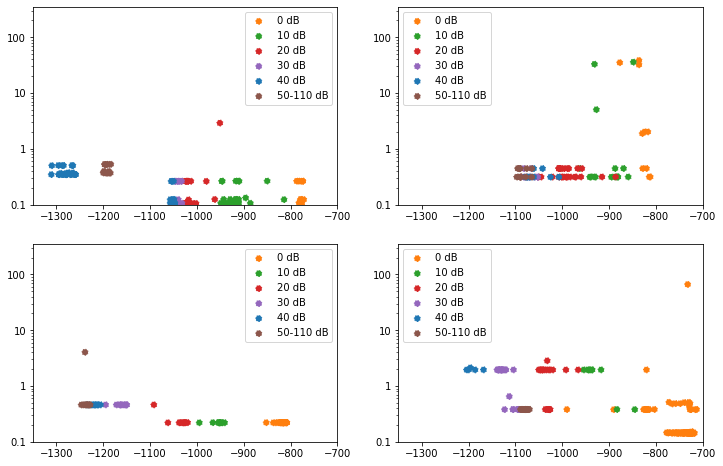

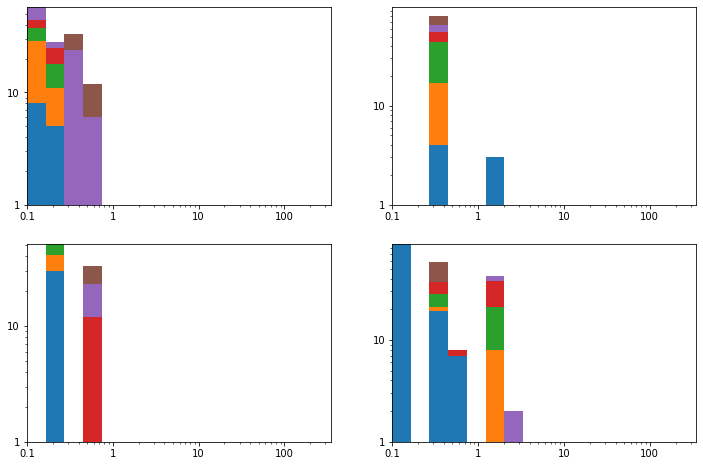

In [179]:
files = []
# files.append(['release/release1/*','release/release16/*','release/release64/*','release/release128/*','release/release256/*','release/release512/*', 'release/release0/*'])
# files.append(['echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*'])
# files.append(['cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*'])
files.append(['drx/cap/*'])
# files.append(['ptau/capture/*'])
files = sum(files, [])
print(files)

cc = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:blue', 'tab:brown']

dirrs = ['logs/zte_mtn/rf_shield/ublox/', 'logs/nokia_vodacom/centurycity/ublox/', 'logs/zte_mtn/rf_shield/quectel/', 'logs/nokia_vodacom/centurycity/quectel/']

ky = 'txTime'
kx = 'Signal power'

limited = True

plimx = [None, None]
plimy = [None, None]
hlimx = [None, None]
hlimy = [None, None]

if limited:
    plimx= [-1350, -700]
    plimy= [0.1, 350]
    hlimx= [0.1, 350]
    hlimy= [0.1, 15]

p4()